In [77]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt
from pydataset import data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score

import evaluate

### 1. Load the tips dataset from either pydataset or seaborn.

In [78]:
tips = data('tips')

In [79]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [80]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [81]:
# Define X and y
X = tips[['total_bill']]
y = tips[['tip']]

In [82]:
model = LinearRegression().fit(X, y)
tips['yhat'] = model.predict(X)

In [83]:
tips['residuals'] = tips.tip - tips.yhat

In [84]:
tips['yhat_baseline'] = tips.tip.mean()

In [85]:
tips['baseline_residuals'] = tips.tip - tips.yhat_baseline

In [86]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,residuals,yhat_baseline,baseline_residuals
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,-1.694636,2.998279,-1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,-0.346223,2.998279,-1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,0.373165,2.998279,0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,-0.097250,2.998279,0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,0.107178,2.998279,0.611721


### 3. Plot the residuals for the linear regression model that you made.

<AxesSubplot:ylabel='Frequency'>

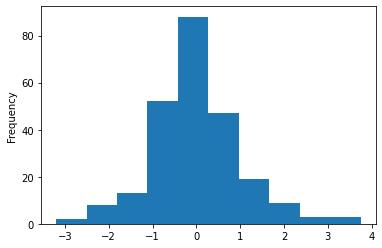

In [87]:
tips.residuals.plot.hist()

### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [88]:
sse = (tips.residuals ** 2).sum()
sse

252.788743850776

In [89]:
ess = ((tips.yhat - tips.yhat_baseline) ** 2).sum()
ess

212.42373319840422

In [90]:
tss = ((tips.tip - tips.yhat_baseline) **2).sum()
tss

465.2124770491804

In [91]:
n = tips.shape[0]

In [92]:
mse = sse / n
mse

1.036019442011377

In [93]:
rmse = sqrt(mse)
rmse

1.0178504025697377

### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [94]:
sse = (tips.baseline_residuals ** 2).sum()
sse

465.2124770491804

In [95]:
mse = sse / n
mse

1.906608512496641

In [96]:
rmse = sqrt(mse)
rmse

1.3807999538298954

In [97]:
# get the R squared for model
ess = ((tips.yhat - tips.tip.mean())**2).sum()
tss = ((tips.tip - tips.tip.mean())**2).sum()

ess / tss

0.4566165863516761

In [98]:
# R2 for baseline
ess = ((tips.yhat_baseline - tips.tip.mean())**2).sum()
tss = ((tips.tip - tips.tip.mean())**2).sum()

print('ess: %.4f' % ess)

ess / tss


ess: 0.0000


0.0

### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

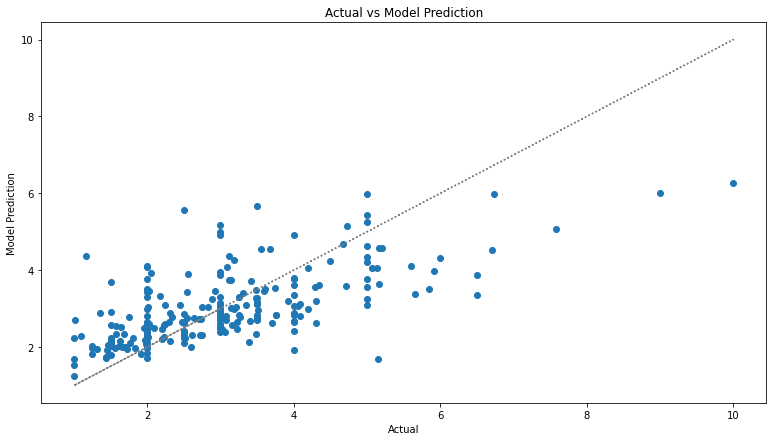

In [99]:
fig, ax = plt.subplots(figsize=(13, 7))
ax.scatter(tips.tip, tips.yhat, label='model prediction')
ax.set(title='Actual vs Model Prediction', ylabel='Model Prediction', xlabel='Actual')
ax.plot(tips.tip, tips.tip, ls=':', c='gray')

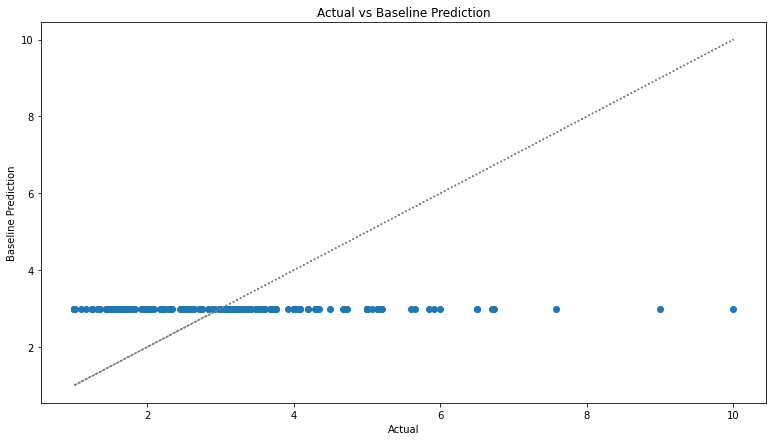

In [100]:
fig, ax = plt.subplots(figsize=(13, 7))
ax.scatter(tips.tip, tips.yhat_baseline, label='baseline prediction')
ax.set(title='Actual vs Baseline Prediction', ylabel='Baseline Prediction', xlabel='Actual')
ax.plot(tips.tip, tips.tip, ls=':', c='gray')

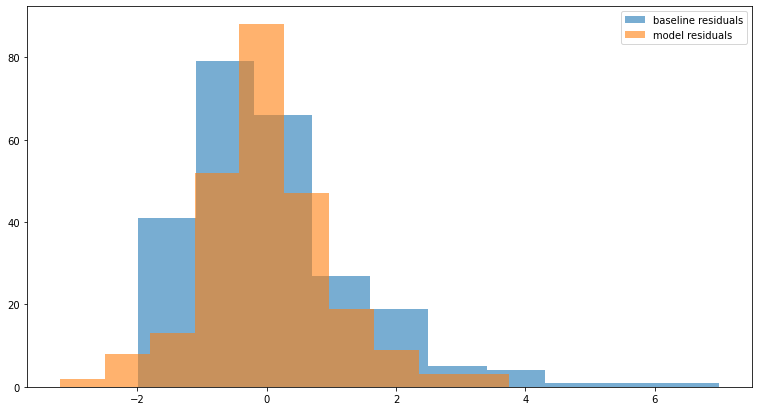

In [101]:
fig, ax = plt.subplots(figsize=(13, 7))

ax.hist(tips.baseline_residuals, label='baseline residuals', alpha=.6)
ax.hist(tips.residuals, label='model residuals', alpha=.6)
ax.legend()

### 7. What is the amount of variance explained in your model?

In [102]:
evs = explained_variance_score(tips.tip, tips.yhat)
evs

0.4566165863516767

### 8. Is your model better than the baseline model?

- Yes

### 9. Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot

In [103]:
def plot_residuals(y, yhat):
    sns.scatterplot(x=y, y=y - yhat)
    plt.title("Residuals")
    plt.ylabel("y - yhat")
    plt.show()

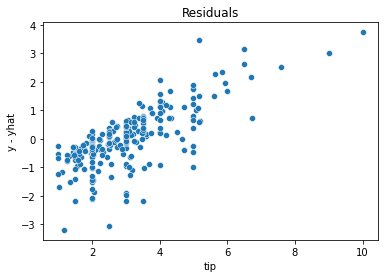

In [104]:
plot_residuals(tips.tip, tips.yhat)

- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)

In [105]:
def regression_errors(df, y, yhat):
    sse = ((y-yhat) ** 2).sum()
    ess = ((yhat - y.mean()) ** 2).sum()
    tss = ((y - y.mean()) **2).sum()
    n = df.shape[0]
    mse = mean_squared_error(y, yhat)
    rmse =  sqrt(mse)
    return sse, ess, tss, mse, rmse

In [106]:
regression_errors(tips, tips.tip, tips.yhat)

(252.788743850776,
 212.42373319840422,
 465.2124770491804,
 1.036019442011377,
 1.0178504025697377)

- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model


In [107]:
def baseline_mean_errors(df, y):
    baseline_residuals = y - y.mean()
    sse_baseline = (baseline_residuals ** 2).sum()
    n = df.shape[0]
    mse_baseline = sse_baseline / n
    rmse_baseline = sqrt(mse_baseline)
    return sse_baseline, mse_baseline, rmse_baseline

In [131]:
baseline_mean_errors(tips, tips.tip)

(465.2124770491804, 1.906608512496641, 1.3807999538298954)

- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [108]:
def better_than_baseline(df,y, yhat):
    SSE, ESS, TSS, MSE, RMSE = regression_errors(df, y, yhat)
    sse_baseline, mse_baseline, rmse_baseline = baseline_mean_errors(df, y)                     
    if (SSE < sse_baseline):
        return True
    else:
        return False

In [109]:
better_than_baseline(tips, tips.tip, tips.yhat)

True

### 10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [110]:
mpg = data('mpg')

In [111]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [112]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [113]:
X = mpg[['displ']]
y = mpg[['hwy']]

In [114]:
model = LinearRegression().fit(X, y)
mpg['yhat'] = model.predict(X)

In [115]:
mpg['residuals'] = mpg.hwy - mpg.yhat

mpg['yhat_baseline'] = mpg.hwy.mean()

mpg['baseline_residuals'] = mpg.hwy - mpg.yhat_baseline

mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,yhat,residuals,yhat_baseline,baseline_residuals
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,29.342591,-0.342591,23.440171,5.559829
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,29.342591,-0.342591,23.440171,5.559829
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,28.636473,2.363527,23.440171,7.559829
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,28.636473,1.363527,23.440171,6.559829
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,25.812002,0.187998,23.440171,2.559829


<AxesSubplot:ylabel='Frequency'>

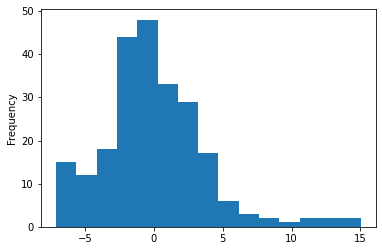

In [116]:
mpg.residuals.plot.hist(bins=15)

<AxesSubplot:ylabel='Frequency'>

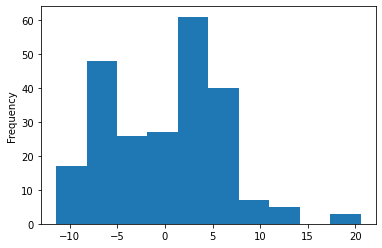

In [117]:
mpg.baseline_residuals.plot.hist()

In [118]:
evs = explained_variance_score(mpg.hwy, mpg.yhat)
evs

0.5867866723989039

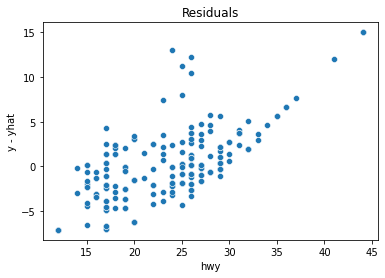

In [119]:
evaluate.plot_residuals(mpg.hwy, mpg.yhat)

## Takeaways:

- Residuals are lower for lower hwy mileage and higher for higher hwy mileage

> could be because we are using linear regression to predict a relationship that may not be linear

In [120]:
sse, ess, tss, mse, rmse = evaluate.regression_errors(mpg, mpg.hwy, mpg.yhat)

print(sse, ess, tss, mse, rmse)

3413.829008995467 4847.8333841669255 8261.66239316239 14.589012858954987 3.8195566312014524


In [121]:
sse_baseline, mse_baseline, rmse_baseline = evaluate.baseline_mean_errors(mpg, mpg.hwy)

print(sse_baseline, mse_baseline, rmse_baseline)

8261.66239316239 35.30624954342902 5.941906221359356


In [122]:
evaluate.better_than_baseline(mpg, mpg.hwy, mpg.yhat)

The model performs better than baseline


True